## Data contains only two categories e.g. pass/fail, yes/no
## additionally $np \geq 10$ and $n(1-p) \geq 10$ i.e. we must have at least 10 successes and 10 failures in our sample. In a way we are approximating a binomial (discrete) distribution with a normal distribution 

### Example: Smoking rate in town is 21%. 100 samples picked and 14 smokers found. Has smoking habits in town changed?
The hypotheses are:
$$
H_0:\quad p = p_0 \\
H_a: \quad p \neq p_0
$$



The test statistic is:
$$
z = \frac{p - p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}
$$

In the example we have $p_0 = 0.21$, $p = 0.14$, $np_0 = 21$, $n(1-p_0) = 79$ so we may use the one proportion test 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import scipy.stats as stats
from statsmodels.stats import weightstats

In [24]:
df = pd.read_csv("Smokers.csv")
print(df["Smokers"].value_counts())
df.head()

No     86
Yes    14
Name: Smokers, dtype: int64


,Name,Smokers
0,Person 1,No
1,Person 2,No
2,Person 3,No
3,Person 4,Yes
4,Person 5,No


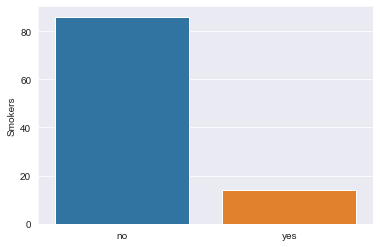

In [23]:
sns.barplot(x=["no", "yes"], y=df["Smokers"].value_counts())
plt.show()

In [33]:
# now the test
stats.binom_test(14, 100, p=0.21, alternative="two-sided")

# p value = 0.109 > 0.05 so we fail to reject the null hypothesis. From this test the proportion of smokers has not changed

0.10920815720825927

In [34]:
# now the test
stats.binom_test(14, 100, p=0.21, alternative="less")

# p value = 0.0504 > 0.05 so we fail to reject the null hypothesis. From this test the proportion of smokers has not changed

0.05042460221552124

In [41]:
# same test
stats.binom_test(df.groupby("Smokers").count()["Name"].values[::-1], p=0.21)

0.10920815720825927